## Создание датасета

In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from matplotlib import cm
import random
import string
import os, errno

def createCatalog(directory):
    try:
      os.makedirs(directory)
    except OSError as e:
      if e.errno != errno.EEXIST:
          raise

classifications = ['Display', 'Sans Serif', 'Serif', 'Monospaced', 'Handwritten', 'Calligraphic', 'Brushed Script', 'Handrawn', 'Script']
handwritten = ['Handwritten', 'Calligraphic', 'Brushed Script', 'Handrawn', 'Script']

for i in classifications:
  path = '/currentData/' + str(i)
  createCatalog(path)
for i in handwritten[1:]:
  path = '/currentData/' + str(i)
  os.rmdir(path)

def generateRandomSample(fontPath, picSize=(200,50)):
  im = Image.new('RGB', picSize, color=('#FFFFFF'))
  font = ImageFont.truetype(fontPath, size=30)
  draw_text = ImageDraw.Draw(im)
  draw_text.text(
      (5, 5),
      generate_random_string(20),
      font=font,
      fill='#000000')
  return im


def generate_random_string(length):
  letters = string.ascii_letters
  rand_string = ''.join(random.choice(letters) for i in range(length))
  # print("Random string of length", length, "is:", rand_string)
  return rand_string

ratio = [86, 143, 84, 12, 96]
num_skipped = 0
cnt = 0
for idx, folder_name in enumerate(('Display', 'Sans Serif', 'Serif', 'Monospaced', 'Handwritten')):
    folder_path = os.path.join("/content/drive/MyDrive/colabData/fontData/data/txtClassification/", folder_name)
    cnt = 0
    for fname in os.listdir(folder_path):
        cnt += 1
        fpath = os.path.join(folder_path, fname)
        # print(fpath)
        # print('/content/drive/MyDrive/colabData/fontData/data/img/'+folder_name+'/'+fname[:-4]+'.png')
        # fullName = '/content/drive/MyDrive/colabData/fontData/data/img/'+folder_name+'/'+fname[:-4]+'.jpg'
        samples = 20
        quantity = int(max(ratio)/ratio[idx])
        for i in range(samples*quantity):
          generateRandomSample(fpath).save('/currentData/'+folder_name+'/'+fname[:-4]+str(i)+'.jpg')
          # print("!")
    #     if cnt == 5:
    #       break
    # break
    print('Подготовлено шрифтов типа {}: {} в количестве {}x{} экземпляров на один шрифт'.format(folder_name, cnt, samples, quantity))
        # generateRandomSample(fpath).save('/content/drive/MyDrive/colabData/fontData/data/img/'+folder_name+fname[:-4]+'.png')
#         try:
#             fobj = open(fpath, "rb")
#             is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
#         finally:
#             fobj.close()

#         if not is_jfif:
#             num_skipped += 1
#             # Delete corrupted image
#             os.remove(fpath)

# print("Deleted %d images" % num_skipped)

Подготовлено шрифтов типа Display: 86 в количестве 20x1 экземпляров на один шрифт
Подготовлено шрифтов типа Sans Serif: 143 в количестве 20x1 экземпляров на один шрифт
Подготовлено шрифтов типа Serif: 84 в количестве 20x1 экземпляров на один шрифт
Подготовлено шрифтов типа Monospaced: 12 в количестве 20x11 экземпляров на один шрифт
Подготовлено шрифтов типа Handwritten: 96 в количестве 20x1 экземпляров на один шрифт


In [ ]:
# Setup
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Downloading
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
!unzip -q kagglecatsanddogs_3367a.zip
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   154M      0  0:00:05  0:00:05 --:--:--  167M
 drive			      'MSR-LA - 3467.docx'  'readme[1].txt'
 kagglecatsanddogs_3367a.zip   PetImages	     sample_data


In [ ]:
!ls PetImages

Cat  Dog


In [ ]:
import json

In [ ]:
with open('data_22.03.2022.json') as json_file:
    data = json.load(json_file)
    # print(data)

In [ ]:
uniquer = ['']
for el, idx in enumerate(data['fonts'][:900]):
  # serif = 'С засечками' if idx['category'] == 'serif' else 'Без засечек'
  # if idx['category'] != 'sans-serif' and idx['category'] != 'serif':
  #   print(el, idx['family'], idx['category'], serif, 'Alarm')
  #   break
  # print(el, idx['family'], idx['category'], serif)
  if idx['category'] in uniquer:
    continue
  uniquer.append(str(idx['category']))
print(uniquer)

['', 'sans-serif', 'serif', 'display', 'handwriting', 'monospace']


In [ ]:
data['fonts']

In [ ]:
uniquer = ['']
for el, idx in enumerate(data['fonts'][:900]):
  # serif = 'С засечками' if idx['category'] == 'serif' else 'Без засечек'
  # if idx['category'] != 'sans-serif' and idx['category'] != 'serif':
  #   print(el, idx['family'], idx['category'], serif, 'Alarm')
  #   break
  # print(el, idx['family'], idx['category'], serif)
  if idx['category'] in uniquer:
    continue
  uniquer.append(str(idx['category']))
print(uniquer)

In [ ]:
catalog = '/content/drive/MyDrive/colabData/fontData/data/classification/imgNormal'
catalog = '/currentData'
folderNames = ['Display', 'Sans Serif', 'Serif', 'Monospaced', 'Handwritten']

In [ ]:
import os

num_skipped = 0
for folder_name in folderNames:
    folder_path = os.path.join(catalog, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [ ]:
image_size = (50, 200)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    catalog,
    label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    catalog,
    label_mode='categorical',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

NameError: ignored

In [ ]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 50, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
test = list(train_ds.as_numpy_iterator()) 

In [ ]:
print(test[1])

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # print(str(labels[i])[10:26])
        plt.title(str(labels[i])[10:26])
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [ ]:
data_augmentation = keras.Sequential(
    [
        # layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
    ]
)

In [ ]:
plt.figure(figsize=(10, 4))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=5)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/colabData/fontData/models/classification/v2/save_at_161.h5')

epochs = 100

callbacks = [
    keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/colabData/fontData/models/classification/v3/save_at_{epoch}.h5"),
]

In [ ]:
epochs = 100

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/colabData/fontData/models/txtClassification/txtClassification_at_{epoch}#{accuracy:.3f}-{val_accuracy:.3f}.h5"
        ),
    keras.callbacks.TensorBoard(log_dir='./logs'),
    # keras.callbacks.EarlyStopping(patience=2)
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/100
271/271 [==============================] - 49s 171ms/step - loss: 0.5556 - accuracy: 0.7845 - val_loss: 12.3281 - val_accuracy: 0.4150
Epoch 2/100
271/271 [==============================] - 46s 169ms/step - loss: 0.5023 - accuracy: 0.8052 - val_loss: 6.1891 - val_accuracy: 0.3558
Epoch 3/100
271/271 [==============================] - 46s 168ms/step - loss: 0.4669 - accuracy: 0.8241 - val_loss: 7.3413 - val_accuracy: 0.4880
Epoch 4/100
271/271 [==============================] - 46s 168ms/step - loss: 0.4259 - accuracy: 0.8396 - val_loss: 2.5954 - val_accuracy: 0.5536
Epoch 5/100
271/271 [==============================] - 46s 168ms/step - loss: 0.4184 - accuracy: 0.8440 - val_loss: 8.3138 - val_accuracy: 0.4949
Epoch 6/100
271/271 [==============================] - 46s 169ms/step - loss: 0.3910 - accuracy: 0.8511 - val_loss: 2.3611 - val_accuracy: 0.5069
Epoch 7/100
271/271 [==============================] - 46s 168ms/step - loss: 0.3663 - accuracy: 0.8589 - val_loss: 2.2852 

In [ ]:
for i in dir():
  print(i)

In [ ]:
initial_epoch = 100
epochs = 200

callbacks = [
    keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/colabData/fontData/models/classification/v3/save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds, initial_epoch=initial_epoch,
)

Epoch 101/200
847/847 [==============================] - 80s 92ms/step - loss: 0.1524 - accuracy: 0.9333 - val_loss: 2.8547 - val_accuracy: 0.4960
Epoch 102/200
847/847 [==============================] - 76s 90ms/step - loss: 0.1420 - accuracy: 0.9364 - val_loss: 3.1768 - val_accuracy: 0.5393
Epoch 103/200
847/847 [==============================] - 78s 92ms/step - loss: 0.1452 - accuracy: 0.9376 - val_loss: 0.5375 - val_accuracy: 0.8266
Epoch 104/200
847/847 [==============================] - 77s 91ms/step - loss: 0.1402 - accuracy: 0.9384 - val_loss: 5.9222 - val_accuracy: 0.5220
Epoch 105/200
847/847 [==============================] - 78s 92ms/step - loss: 0.1424 - accuracy: 0.9403 - val_loss: 0.7373 - val_accuracy: 0.7757
Epoch 106/200
847/847 [==============================] - 79s 93ms/step - loss: 0.1357 - accuracy: 0.9414 - val_loss: 0.5838 - val_accuracy: 0.8248
Epoch 107/200
847/847 [==============================] - 81s 95ms/step - loss: 0.1339 - accuracy: 0.9431 - val_loss: 6

In [ ]:
initial_epochs = 51
epochs = 100

callbacks = [
    keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/colabData/fontData/models/classification/v2/save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds, initial_epochs=initial_epochs,
)

Epoch 1/100
498/498 [==============================] - 91s 175ms/step - loss: 0.2277 - accuracy: 0.8987 - val_loss: 0.4777 - val_accuracy: 0.8467
Epoch 2/100
498/498 [==============================] - 86s 173ms/step - loss: 0.2216 - accuracy: 0.9029 - val_loss: 11.4852 - val_accuracy: 0.4355
Epoch 3/100
498/498 [==============================] - 87s 174ms/step - loss: 0.2251 - accuracy: 0.9021 - val_loss: 18.0178 - val_accuracy: 0.3581
Epoch 4/100
498/498 [==============================] - 87s 174ms/step - loss: 0.2210 - accuracy: 0.9040 - val_loss: 1.8090 - val_accuracy: 0.6916
Epoch 5/100
498/498 [==============================] - 88s 175ms/step - loss: 0.2226 - accuracy: 0.9032 - val_loss: 9.1219 - val_accuracy: 0.4443
Epoch 6/100
498/498 [==============================] - 87s 174ms/step - loss: 0.2144 - accuracy: 0.9067 - val_loss: 2.1465 - val_accuracy: 0.5318
Epoch 7/100
498/498 [==============================] - 87s 174ms/step - loss: 0.2150 - accuracy: 0.9098 - val_loss: 4.1855

In [ ]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/colabData/fontData/models/classification/v3/save_at_51.h5')


callbacks = [
    keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/colabData/fontData/models/classification/v3/save_at_{epoch}.h5"),
]

In [ ]:
initial_epochs = 161
epochs = 200

# callbacks = [
#     keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/colabData/fontData/models/classification/v3/save_at_{epoch}.h5"),
# ]
# model.compile(
#     optimizer=keras.optimizers.Adam(1e-3),
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
# )
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds, initial_epoch=initial_epochs,
)

Epoch 162/200
847/847 [==============================] - 86s 86ms/step - loss: 0.2556 - accuracy: 0.8906 - val_loss: 1.2908 - val_accuracy: 0.6917
Epoch 163/200
847/847 [==============================] - 74s 87ms/step - loss: 0.2462 - accuracy: 0.8934 - val_loss: 11.2875 - val_accuracy: 0.3160
Epoch 164/200
847/847 [==============================] - 75s 88ms/step - loss: 0.2377 - accuracy: 0.8960 - val_loss: 0.5009 - val_accuracy: 0.8322
Epoch 165/200
847/847 [==============================] - 75s 89ms/step - loss: 0.2313 - accuracy: 0.8997 - val_loss: 0.4833 - val_accuracy: 0.8409
Epoch 166/200
847/847 [==============================] - 76s 89ms/step - loss: 0.2318 - accuracy: 0.8984 - val_loss: 2.8967 - val_accuracy: 0.6110
Epoch 167/200
847/847 [==============================] - 75s 89ms/step - loss: 0.2270 - accuracy: 0.8998 - val_loss: 1.0583 - val_accuracy: 0.7589
Epoch 168/200
847/847 [==============================] - 76s 90ms/step - loss: 0.2251 - accuracy: 0.9015 - val_loss: 

In [ ]:
initial_epochs = 200
epochs = 250

# callbacks = [
#     keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/colabData/fontData/models/classification/v3/save_at_{epoch}.h5"),
# ]
# model.compile(
#     optimizer=keras.optimizers.Adam(1e-3),
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
# )
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds, initial_epoch=initial_epochs,
)

Epoch 201/250
847/847 [==============================] - 76s 89ms/step - loss: 0.1035 - accuracy: 0.9584 - val_loss: 1.2480 - val_accuracy: 0.7479
Epoch 202/250
847/847 [==============================] - 76s 89ms/step - loss: 0.1036 - accuracy: 0.9567 - val_loss: 9.1099 - val_accuracy: 0.4665
Epoch 203/250
847/847 [==============================] - 76s 89ms/step - loss: 0.0941 - accuracy: 0.9612 - val_loss: 70.0175 - val_accuracy: 0.2014
Epoch 204/250
847/847 [==============================] - 76s 89ms/step - loss: 0.0991 - accuracy: 0.9585 - val_loss: 0.9097 - val_accuracy: 0.7909
Epoch 205/250
847/847 [==============================] - 76s 89ms/step - loss: 0.0933 - accuracy: 0.9634 - val_loss: 0.6501 - val_accuracy: 0.8207
Epoch 206/250
847/847 [==============================] - 77s 90ms/step - loss: 0.0900 - accuracy: 0.9630 - val_loss: 4.5738 - val_accuracy: 0.5012
Epoch 207/250
847/847 [==============================] - 76s 89ms/step - loss: 0.0918 - accuracy: 0.9638 - val_loss: 

In [ ]:
initial_epochs = 250
epochs = 300

# callbacks = [
#     keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/colabData/fontData/models/classification/v3/save_at_{epoch}.h5"),
# ]
# model.compile(
#     optimizer=keras.optimizers.Adam(1e-3),
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
# )
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds, initial_epoch=initial_epochs,
)

Epoch 251/300
847/847 [==============================] - 72s 85ms/step - loss: 0.0522 - accuracy: 0.9814 - val_loss: 1.1045 - val_accuracy: 0.7953
Epoch 252/300
847/847 [==============================] - 73s 86ms/step - loss: 0.0470 - accuracy: 0.9831 - val_loss: 0.8140 - val_accuracy: 0.8602
Epoch 253/300
847/847 [==============================] - 73s 86ms/step - loss: 0.0500 - accuracy: 0.9821 - val_loss: 5.6361 - val_accuracy: 0.5682
Epoch 254/300
847/847 [==============================] - 73s 86ms/step - loss: 0.0432 - accuracy: 0.9852 - val_loss: 52.1467 - val_accuracy: 0.2013
Epoch 255/300
847/847 [==============================] - 73s 86ms/step - loss: 0.0473 - accuracy: 0.9835 - val_loss: 108.2512 - val_accuracy: 0.2000
Epoch 256/300
847/847 [==============================] - 73s 86ms/step - loss: 0.0482 - accuracy: 0.9826 - val_loss: 0.8127 - val_accuracy: 0.8248
Epoch 257/300
847/847 [==============================] - 73s 86ms/step - loss: 0.0413 - accuracy: 0.9849 - val_loss

In [ ]:
initial_epochs = 300
epochs = 350

# callbacks = [
#     keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/colabData/fontData/models/classification/v3/save_at_{epoch}.h5"),
# ]
# model.compile(
#     optimizer=keras.optimizers.Adam(1e-3),
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
# )
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds, initial_epoch=initial_epochs,
)

Epoch 301/350
847/847 [==============================] - 72s 85ms/step - loss: 0.0367 - accuracy: 0.9870 - val_loss: 0.8981 - val_accuracy: 0.8445
Epoch 302/350
847/847 [==============================] - 73s 86ms/step - loss: 0.0312 - accuracy: 0.9882 - val_loss: 0.7171 - val_accuracy: 0.8660
Epoch 303/350
847/847 [==============================] - 73s 87ms/step - loss: 0.0319 - accuracy: 0.9889 - val_loss: 0.7221 - val_accuracy: 0.8794
Epoch 304/350
847/847 [==============================] - 74s 87ms/step - loss: 0.0333 - accuracy: 0.9878 - val_loss: 0.8562 - val_accuracy: 0.8691
Epoch 305/350
847/847 [==============================] - 74s 87ms/step - loss: 0.0331 - accuracy: 0.9882 - val_loss: 1.1740 - val_accuracy: 0.7831
Epoch 306/350
847/847 [==============================] - 74s 87ms/step - loss: 0.0315 - accuracy: 0.9889 - val_loss: 16.4352 - val_accuracy: 0.4414
Epoch 307/350
847/847 [==============================] - 74s 88ms/step - loss: 0.0374 - accuracy: 0.9870 - val_loss: 

In [ ]:
initial_epochs = 350
epochs = 500

# callbacks = [
#     keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/colabData/fontData/models/classification/v3/save_at_{epoch}.h5"),
# ]
# model.compile(
#     optimizer=keras.optimizers.Adam(1e-3),
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
# )
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds, initial_epoch=initial_epochs,
)

NameError: ignored

v2 - 14:00 - 15:00

In [ ]:
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/100
847/847 [==============================] - 156s 174ms/step - loss: 0.2897 - accuracy: 0.8748 - val_loss: 15.5932 - val_accuracy: 0.2667
Epoch 2/100
847/847 [==============================] - 146s 172ms/step - loss: 0.2649 - accuracy: 0.8820 - val_loss: 0.3971 - val_accuracy: 0.8523
Epoch 3/100
847/847 [==============================] - 273s 322ms/step - loss: 0.2529 - accuracy: 0.8888 - val_loss: 26.6985 - val_accuracy: 0.2522
Epoch 4/100
847/847 [==============================] - 146s 172ms/step - loss: 0.2555 - accuracy: 0.8851 - val_loss: 6.5442 - val_accuracy: 0.3439
Epoch 5/100
847/847 [==============================] - 146s 172ms/step - loss: 0.2516 - accuracy: 0.8902 - val_loss: 9.3353 - val_accuracy: 0.3635
Epoch 6/100
847/847 [==============================] - 147s 173ms/step - loss: 0.2492 - accuracy: 0.8908 - val_loss: 0.6178 - val_accuracy: 0.8195
Epoch 7/100
847/847 [==============================] - 147s 173ms/step - loss: 0.2448 - accuracy: 0.8914 - val_loss:

In [ ]:
import urllib.request
logo = urllib.request.urlopen("https://drive.google.com/uc?id=11wr7gI-qe_MUHG_hIlJM4edKPKTuLph6&export=download").read()
f = open("model.h5", "wb")
f.write(logo)
f.close()

def createModel(modelPath, imageSize=(50, 200)):
  model = keras.models.load_model(modelPath)
  return imageSize, model

imageSize, model = createModel(
    '/content/model.h5'
    )

In [ ]:
val_ds

In [ ]:
val_ds

predictions = model.predict(val_ds)

In [ ]:
predictions = model.evaluate(val_ds)


68/68 [==============================] - 42s 609ms/step - loss: 0.3598 - accuracy: 0.9076


In [ ]:
import numpy as np

In [ ]:
npValDS = np.array(val_ds)
predictions

array([[6.0471621e-08, 7.5324379e-11, 9.9998868e-01, 1.1262388e-05,
        1.6350381e-09],
       [4.3020823e-06, 2.1629059e-07, 9.9992132e-01, 7.4161995e-05,
        1.6252377e-08],
       [3.6005338e-15, 8.4308764e-15, 1.0000000e+00, 1.1279078e-09,
        1.4667491e-16],
       ...,
       [7.5908375e-01, 2.3725349e-02, 1.9024528e-11, 2.1594128e-01,
        1.2495592e-03],
       [2.9397242e-11, 1.1903720e-13, 6.4812835e-09, 3.1500754e-08,
        1.0000000e+00],
       [8.7350972e-02, 1.1186209e-09, 2.1995601e-09, 2.2301410e-05,
        9.1262680e-01]], dtype=float32)

In [ ]:
dataset = tfds.load('mnist')

train, test = dataset['train'], dataset['test']

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
test

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
val_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 50, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
type(val_ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [ ]:
plt.figure(figsize=(10, 4))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # print(str(labels[i])[10:26])
        plt.title(str(labels[i])[10:26])
        plt.axis("off")

In [ ]:
# img = keras.preprocessing.image.load_img(
#     "/content/drive/MyDrive/colabData/fontData/data/classification/img/Monospaced/Courier Prime10.jpg", target_size=image_size
# )
# img_array = keras.preprocessing.image.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(val_ds)
score = predictions[0]
# print(score)
print(
    "This image is %.2f percent Display || %.2f percent Sans Serif || %.2f percent Serif || %.2f percent Monospaced || %.2f percent Handwritten."
    % (100 * score[0], 100 * score[1], 100 * score[2], 100 * score[3], 100 * score[4])
)

This image is 1.64 percent Display || 0.00 percent Sans Serif || 38.62 percent Serif || 0.00 percent Monospaced || 59.74 percent Handwritten.


In [ ]:
tmp = list(val_ds)
len(val_ds)

68

In [ ]:
np.array(tmp[64][1])

In [ ]:
from google.colab.patches import cv2_imshow


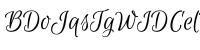

array([0, 1, 0, 0, 0])

In [ ]:
tmpSmallPic = np.array(tmp[0][0][0]).astype(int)
cv2_imshow(tmpSmallPic)

tmpSmallLabel= np.array(tmp[0][1]).astype(int)
tmpSmallLabel[0]

In [ ]:
len(tmp)

68

In [ ]:
img_array = keras.preprocessing.image.img_to_array(tmpSmallPic)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

prediction = model.predict(img_array) > 0.5
(prediction[0].astype(int) == tmpSmallLabel[0]).any()

True

In [ ]:
predictions = model.predict(val_ds) > 0.5

In [ ]:
len(predictions)

2164

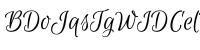

[0 0 0 0 1] [0 1 0 0 0]


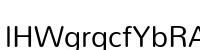

[0 0 1 0 0] [0 0 0 1 0]


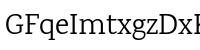

[1 0 0 0 0] [0 0 0 0 1]


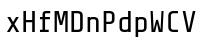

[0 1 0 0 0] [0 0 1 0 0]


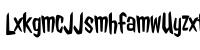

[0 0 0 0 1] [0 1 0 0 0]


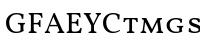

[0 0 0 1 0] [0 0 0 0 1]


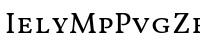

[0 1 0 0 0] [0 0 0 0 1]


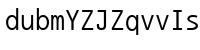

[0 0 0 1 0] [0 0 1 0 0]


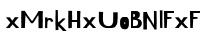

[0 0 0 0 1] [1 0 0 0 0]


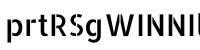

[0 1 0 0 0] [0 0 0 1 0]


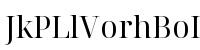

[0 0 1 0 0] [0 0 0 0 1]


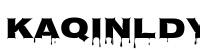

[0 0 0 0 1] [1 0 0 0 0]


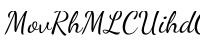

[0 0 0 1 0] [0 1 0 0 0]


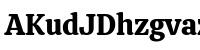

[0 0 0 1 0] [0 0 0 0 1]


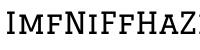

[0 0 1 0 0] [0 0 0 0 1]


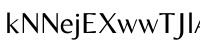

[0 0 1 0 0] [0 0 0 1 0]


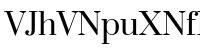

[0 0 0 1 0] [0 0 0 0 1]


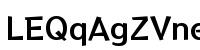

[0 0 1 0 0] [1 0 0 0 0]


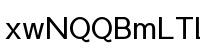

[0 0 0 0 1] [0 0 0 1 0]


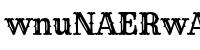

[0 0 0 0 1] [1 0 0 0 0]


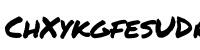

[0 0 0 1 0] [0 1 0 0 0]


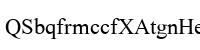

[0 0 1 0 0] [0 0 0 0 1]


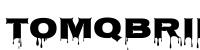

[0 0 1 0 0] [1 0 0 0 0]


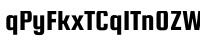

[0 0 1 0 0] [0 0 0 1 0]


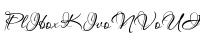

[0 0 0 1 0] [0 1 0 0 0]

Общее количество ошибок: 32


In [ ]:
i = 0
for batch in tmp[:1]:
  # tmpSmallPic = np.array(batch[0][0]).astype(int)
  # print(batch[1])
  # cv2_imshow(tmpSmallPic)

  # tmpSmallLabel= np.array(tmp[0][1]).astype(int)
  # tmpSmallLabel[0]
  for ans in batch[1]:
    if (predictions[i].astype(int) != np.array(ans).astype(int)).any():
      # cv2_imshow(batch[0][i])
      cv2_imshow(np.array(batch[0][i]))
      print(predictions[i].astype(int), np.array(ans).astype(int))
    i += 1
  #   if i >= 1:
  #     break
  # break
  print('\nОбщее количество ошибок:', i)


In [ ]:
# print(predictions)
tmpPredictions = predictions > 0.5
# tmpSmall[0]
tmpPredictions = tmpPredictions.astype(int)
print(tmpPredictions)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [ ]:
tmpSmall == tmpPredictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [ ]:
for idx, arr in enumerate(tmpPredictions):
  print((tmpSmall[0]==arr).all())

False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
True
True
False
False
False
False
True
True
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
True
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
True
False
True
False
True
False
True

In [ ]:
len(predictions)

2164